# Combining two Czech COVID datasets

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

# 1. preparing the first dataset

In [2]:
df1 = pd.read_csv('..\\00-source-data\\testy.csv')
df1.head()

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu
0,2020-01-27,20,20
1,2020-01-28,8,28
2,2020-01-29,5,33
3,2020-01-30,1,34
4,2020-01-31,3,37


In [3]:
len(df1)

261

In [4]:
df1.dtypes

datum                      object
prirustkovy_pocet_testu     int64
kumulativni_pocet_testu     int64
dtype: object

In [5]:
df1['datum'] = df1['datum'].apply(pd.to_datetime)
df1.dtypes

datum                      datetime64[ns]
prirustkovy_pocet_testu             int64
kumulativni_pocet_testu             int64
dtype: object

In [6]:
df1.dropna()
len(df1)

261

In [7]:
df1.isnull().sum()

datum                      0
prirustkovy_pocet_testu    0
kumulativni_pocet_testu    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE18AA6760>,
      dtype=object)

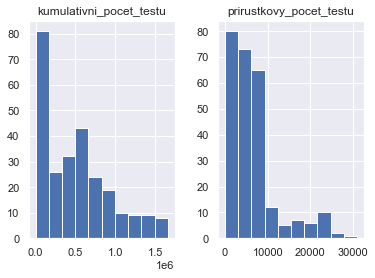

In [8]:
df1.hist()

In [9]:
df1.describe()

,prirustkovy_pocet_testu,kumulativni_pocet_testu
count,261.000000,2.610000e+02
mean,6353.758621,4.956541e+05
std,6100.358074,4.399982e+05
min,0.000000,2.000000e+01
25%,2127.000000,6.209000e+04
50%,4891.000000,4.703310e+05
75%,7809.000000,7.550160e+05
max,30894.000000,1.658331e+06


# 2. preparing the second dataset

In [11]:
df2 = pd.read_csv('..\\00-source-data\\umrti.csv')
df2.head()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod
0,2020-03-22,94,M,CZ010,CZ0100
1,2020-03-24,73,Z,CZ010,CZ0100
2,2020-03-24,44,M,CZ080,CZ0802
3,2020-03-25,91,Z,CZ010,CZ0100
4,2020-03-25,79,M,CZ053,CZ0532


In [12]:
len(df2)

1031

In [13]:
df2.dtypes

datum            object
vek               int64
pohlavi          object
kraj_nuts_kod    object
okres_lau_kod    object
dtype: object

In [14]:
df2['datum'] = df2['datum'].apply(pd.to_datetime)
df2.dtypes

datum            datetime64[ns]
vek                       int64
pohlavi                  object
kraj_nuts_kod            object
okres_lau_kod            object
dtype: object

In [15]:
df2.isnull().sum()

datum            0
vek              0
pohlavi          0
kraj_nuts_kod    0
okres_lau_kod    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE19258D60>]],
      dtype=object)

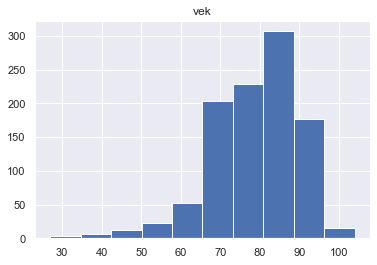

In [16]:
df2.hist()

In [17]:
df2.describe()

,vek
count,1031.000000
mean,78.651794
std,11.077134
min,27.000000
25%,72.000000
50%,80.000000
75%,87.000000
max,104.000000


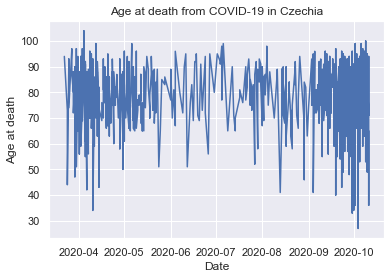

In [18]:
x = df2['datum']
y = df2['vek']
fig, ax = plt.subplots()
ax.set_title('Age at death from COVID-19 in Czechia')
ax.set_ylabel('Age at death')
ax.set_xlabel('Date')
ax.tick_params(axis='y')    
ax.plot(x, y)

In [19]:
df2_grouped = df2.groupby('datum').count()

In [20]:
df2_grouped.head()

,vek,pohlavi,kraj_nuts_kod,okres_lau_kod
datum,,,,
2020-03-22,1,1,1,1
2020-03-24,2,2,2,2
2020-03-25,7,7,7,7
2020-03-27,2,2,2,2
2020-03-28,5,5,5,5


In [21]:
df2_grouped = df2_grouped.rename(columns = {'vek': 'pocet_umrti',}, inplace = False)

In [22]:
df2_grouped['pocet_umrti']

datum
2020-03-22     1
2020-03-24     2
2020-03-25     7
2020-03-27     2
2020-03-28     5
              ..
2020-10-07    46
2020-10-08    25
2020-10-09    54
2020-10-10    48
2020-10-11    39
Name: pocet_umrti, Length: 170, dtype: int64

In [23]:
df2_grouped.index

DatetimeIndex(['2020-03-22', '2020-03-24', '2020-03-25', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02',
               ...
               '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05',
               '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09',
               '2020-10-10', '2020-10-11'],
              dtype='datetime64[ns]', name='datum', length=170, freq=None)

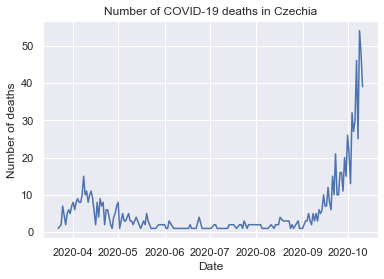

In [24]:
x = df2_grouped.index
y = df2_grouped['pocet_umrti']
fig, ax = plt.subplots()
ax.set_title('Number of COVID-19 deaths in Czechia')
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Date')
ax.tick_params(axis='y') 
plt.plot(x, y)

# 3. combining datasets

In [25]:
df1.tail(10)

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu
251,2020-10-04,7766,1458796
252,2020-10-05,17716,1476512
253,2020-10-06,22986,1499498
254,2020-10-07,23964,1523462
255,2020-10-08,25051,1548513
256,2020-10-09,27553,1576066
257,2020-10-10,17976,1594042
258,2020-10-11,11477,1605519
259,2020-10-12,21918,1627437
260,2020-10-13,30894,1658331


In [26]:
df2_grouped.drop(['pohlavi', 'kraj_nuts_kod', 'okres_lau_kod'], axis='columns', inplace=True)

In [27]:
df2_grouped.tail(10)

,pocet_umrti
datum,
2020-10-02,21
2020-10-03,13
2020-10-04,32
2020-10-05,27
2020-10-06,30
2020-10-07,46
2020-10-08,25
2020-10-09,54
2020-10-10,48


In [28]:
df_merged = pd.merge(df1, df2_grouped, how='left', on='datum')

In [29]:
df_merged.tail(10)

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu,pocet_umrti
251,2020-10-04,7766,1458796,32.0
252,2020-10-05,17716,1476512,27.0
253,2020-10-06,22986,1499498,30.0
254,2020-10-07,23964,1523462,46.0
255,2020-10-08,25051,1548513,25.0
256,2020-10-09,27553,1576066,54.0
257,2020-10-10,17976,1594042,48.0
258,2020-10-11,11477,1605519,39.0
259,2020-10-12,21918,1627437,NaN
260,2020-10-13,30894,1658331,NaN


In [30]:
df_merged.isnull().sum()

datum                       0
prirustkovy_pocet_testu     0
kumulativni_pocet_testu     0
pocet_umrti                91
dtype: int64

In [31]:
df_merged = df_merged.fillna(0)

In [32]:
df_merged.isnull().sum()

datum                      0
prirustkovy_pocet_testu    0
kumulativni_pocet_testu    0
pocet_umrti                0
dtype: int64

In [33]:
df_merged.tail(10)

,datum,prirustkovy_pocet_testu,kumulativni_pocet_testu,pocet_umrti
251,2020-10-04,7766,1458796,32.0
252,2020-10-05,17716,1476512,27.0
253,2020-10-06,22986,1499498,30.0
254,2020-10-07,23964,1523462,46.0
255,2020-10-08,25051,1548513,25.0
256,2020-10-09,27553,1576066,54.0
257,2020-10-10,17976,1594042,48.0
258,2020-10-11,11477,1605519,39.0
259,2020-10-12,21918,1627437,0.0
260,2020-10-13,30894,1658331,0.0


# 4. plotting combining datasets

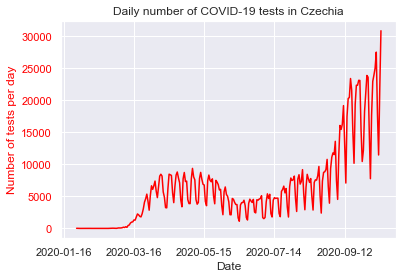

In [34]:
x = df_merged['datum']
y1 = df_merged['prirustkovy_pocet_testu']

def plot(x, y, ax, title, y_label, plot_color, x_label):
    ax.set_title(title)
    ax.set_ylabel(y_label, color=plot_color)
    ax.set_xlabel(x_label)
    ax.tick_params(axis='y', labelcolor=plot_color)    
    ax.plot(x, y, color=plot_color)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

fig, ax = plt.subplots()
plot(x, y1, ax, 'Daily number of COVID-19 tests in Czechia', 'Number of tests per day', 'red', 'Date')

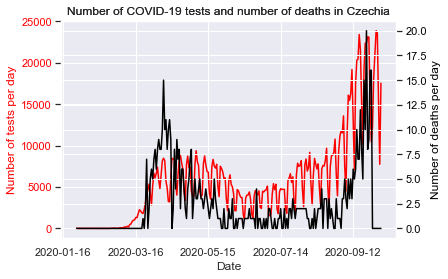

In [108]:
y2 = df_merged['pocet_umrti']

combined_title = 'Number of COVID-19 tests and number of deaths in Czechia'

fig, ax1 = plt.subplots()
plot(x, y1, ax1, combined_title, 'Number of tests per day', 'red', 'Date')
ax2 = ax1.twinx()
plot(x, y2, ax2, combined_title, 'Number of deaths per day', 'black', 'Date')